Dimension reduction and state space forecasting, script 2 of the whole program, Chi Zhang

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE

In [7]:
LIBOR_zero = pd.read_excel(r'C:\Users\Richard\Desktop\CurrentTerm\ISYE 8900\CurveFrcst-Using-ManifoldLrn\Data\LIBOR_clean.xlsx', index_col = 0, sheet_name='zero')
#LIBOR_zero

In [8]:
LIBOR_fwd = pd.read_excel(r'C:\Users\Richard\Desktop\CurrentTerm\ISYE 8900\CurveFrcst-Using-ManifoldLrn\Data\LIBOR_clean.xlsx', index_col = 0, sheet_name='forward')

In [9]:
SOFR_zero = pd.read_excel(r'C:\Users\Richard\Desktop\CurrentTerm\ISYE 8900\CurveFrcst-Using-ManifoldLrn\Data\SOFR_clean.xlsx', index_col = 0, sheet_name='zero')
#SOFR_zero

In [10]:
SOFR_fwd = pd.read_excel(r'C:\Users\Richard\Desktop\CurrentTerm\ISYE 8900\CurveFrcst-Using-ManifoldLrn\Data\SOFR_clean.xlsx', index_col = 0, sheet_name='forward')

In [11]:
Treasury_zero = pd.read_excel(r'C:\Users\Richard\Desktop\CurrentTerm\ISYE 8900\CurveFrcst-Using-ManifoldLrn\Data\Treasury_clean.xlsx', index_col = 0, sheet_name='zero')
#Treasury_zero

In [12]:
Treasury_fwd = pd.read_excel(r'C:\Users\Richard\Desktop\CurrentTerm\ISYE 8900\CurveFrcst-Using-ManifoldLrn\Data\Treasury_clean.xlsx', index_col = 0, sheet_name='forward')

## Spread calculation

In [13]:
SwapSpd_zero = LIBOR_zero - Treasury_zero
BasisSpd_zero = LIBOR_zero - SOFR_zero

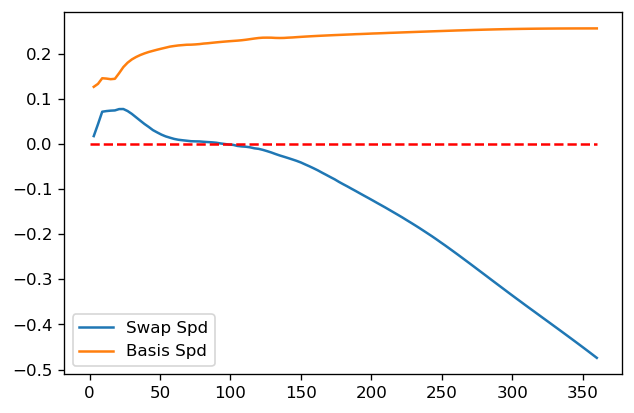

In [14]:
plt.figure(10,dpi=120)
l1, = plt.plot(SwapSpd_zero.columns, SwapSpd_zero.loc['2020-10-30'])
l2, = plt.plot(BasisSpd_zero.columns, BasisSpd_zero.loc['2020-10-30'])
plt.plot([0, 360], [0, 0], c='r', linestyle='--')
plt.legend(handles=[l1,l2], labels = ['Swap Spd','Basis Spd'], loc='best')

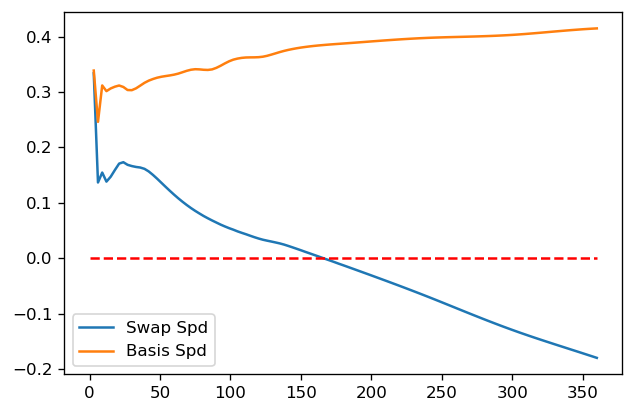

In [15]:
plt.figure(11,dpi=120)
l1, = plt.plot(SwapSpd_zero.columns, SwapSpd_zero.loc['2018-11-02'])
l2, = plt.plot(BasisSpd_zero.columns, BasisSpd_zero.loc['2018-11-02'])
plt.plot([0, 360], [0, 0], c='r', linestyle='--')
plt.legend(handles=[l1,l2], labels = ['Swap Spd','Basis Spd'], loc='best')

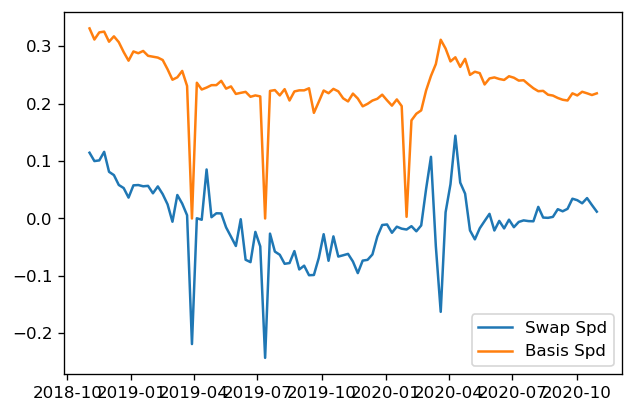

In [16]:
plt.figure(12,dpi=120)
l1, = plt.plot(SwapSpd_zero.index, SwapSpd_zero[60])
l2, = plt.plot(BasisSpd_zero.index, BasisSpd_zero[60])
plt.legend(handles=[l1,l2], labels = ['Swap Spd','Basis Spd'], loc='best')

## DmnsRdct1: PCA

In [68]:
def DmnsRdct1(curve_data):
    scaler = StandardScaler()
    scaler.fit(curve_data)
    curve_data_scaled = scaler.transform(curve_data)
    
    model1 = PCA(n_components=3, copy=True, whiten=False)
    model1.fit(curve_data_scaled)
    curve_data_low = pd.DataFrame(model1.transform(curve_data_scaled))
    curve_data_low.index = curve_data.index
    
    for i, pc in enumerate(model1.explained_variance_ratio_):
        print('{0}.\t{1:2.2f}%'.format(i+1,pc*100.0))
        
    fig = plt.figure(figsize=(8,6))
    plt.title('First {0} PCA components'.format(np.shape(np.transpose(model1.components_))[1]))
    l1, = plt.plot(curve_data.columns, np.transpose(model1.components_)[:,0])
    l2, = plt.plot(curve_data.columns, np.transpose(model1.components_)[:,1])
    l3, = plt.plot(curve_data.columns, np.transpose(model1.components_)[:,2])
    plt.legend(handles=[l1,l2,l3], labels = ['1 pc','2 pc','3 pc'], loc='best')
    
    fig = plt.figure(figsize=(8,6))
    plt.title('Projection on {0}. and {1}. PC'.format(0+1,1+1))
    plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
    plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)

    sc = plt.scatter(Treasury_zero_low.loc[:,0],Treasury_zero_low.loc[:,1], c=[d.year + d.month/12 for d in Treasury_zero_low.index], cmap='rainbow')
    cb = plt.colorbar(sc)
    
    fig = plt.figure(figsize=(8,6))
    plt.title('Projection on {0}. and {1}. PC'.format(0+1,2+1))
    plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
    plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)

    sc = plt.scatter(Treasury_zero_low.loc[:,0],Treasury_zero_low.loc[:,2], c=[d.year + d.month/12 for d in Treasury_zero_low.index], cmap='rainbow')
    cb = plt.colorbar(sc)
    
    fig = plt.figure(figsize=(8,6))
    plt.title('Projection on {0}. and {1}. PC'.format(1+1,2+1))
    plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
    plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)

    sc = plt.scatter(Treasury_zero_low.loc[:,1],Treasury_zero_low.loc[:,2], c=[d.year + d.month/12 for d in Treasury_zero_low.index], cmap='rainbow')
    cb = plt.colorbar(sc)

1.	99.32%
2.	0.51%
3.	0.14%


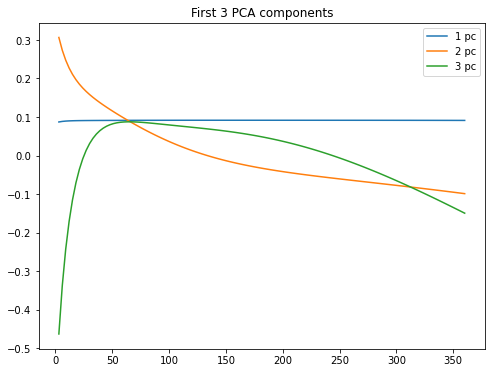

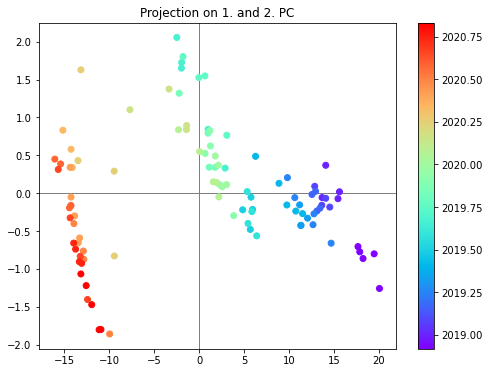

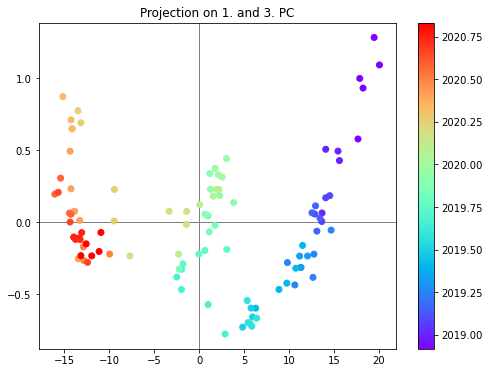

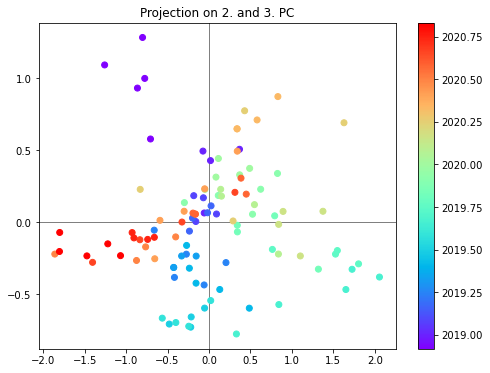

In [70]:
DmnsRdct1(Treasury_zero)

1.	99.10%
2.	0.76%
3.	0.12%


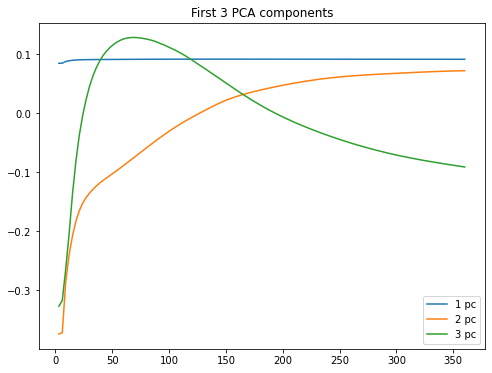

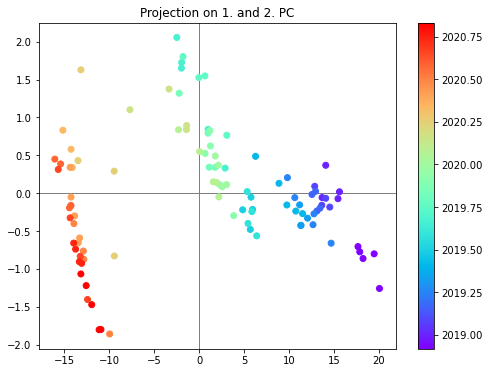

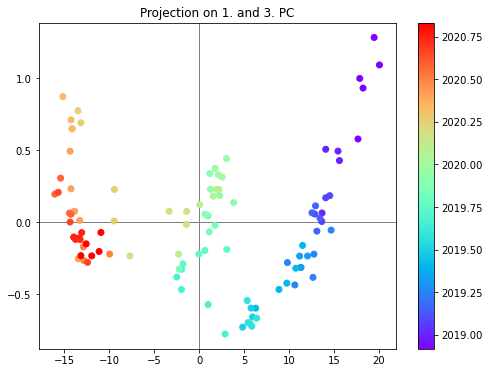

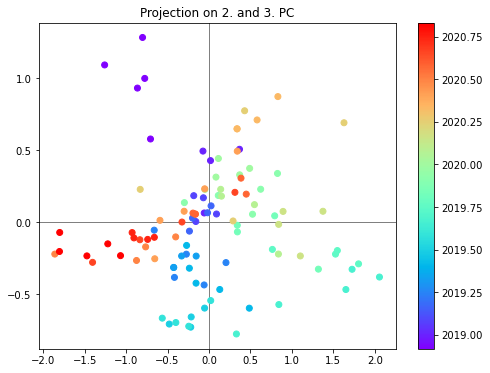

In [71]:
DmnsRdct1(LIBOR_zero)

1.	99.20%
2.	0.56%
3.	0.20%


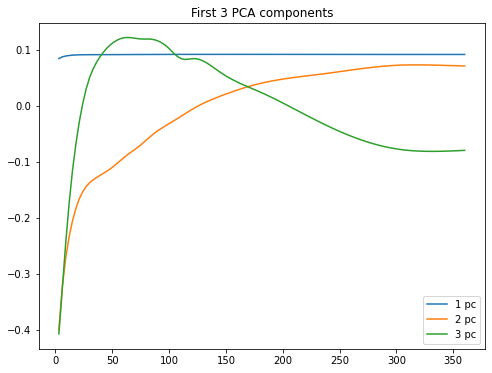

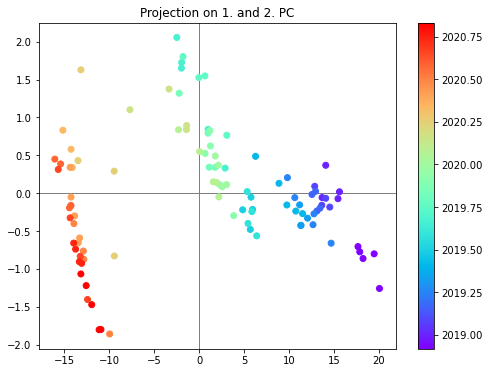

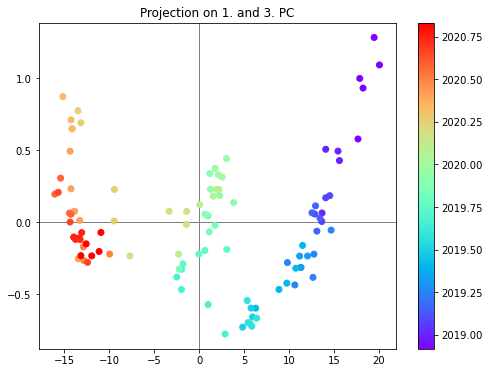

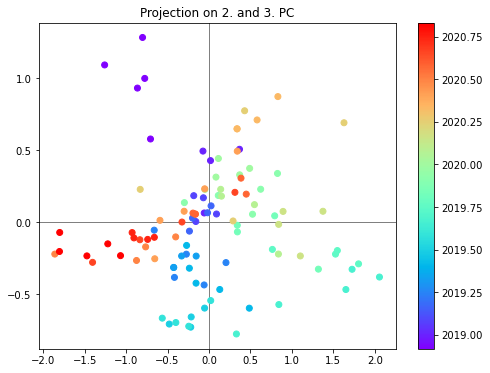

In [73]:
DmnsRdct1(SOFR_zero)

1.	79.55%
2.	13.18%
3.	5.34%


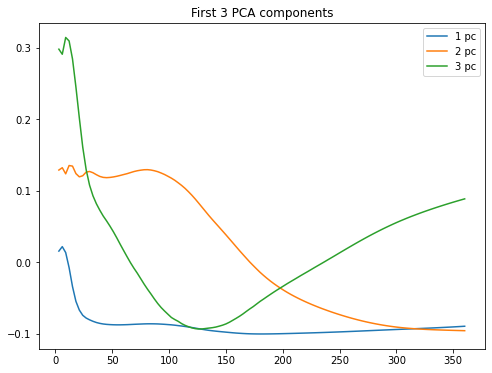

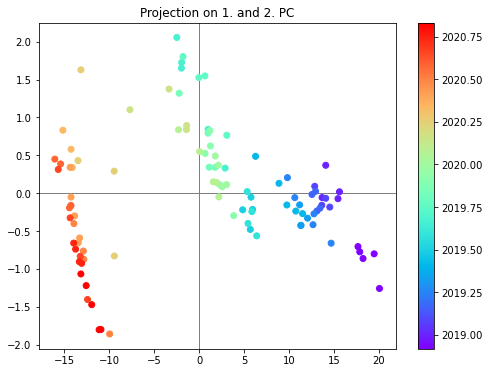

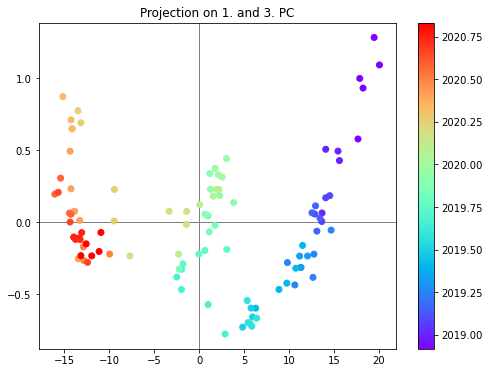

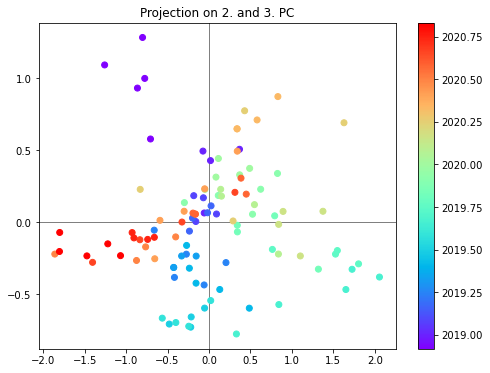

In [72]:
DmnsRdct1(SwapSpd_zero)

1.	87.94%
2.	7.95%
3.	1.81%


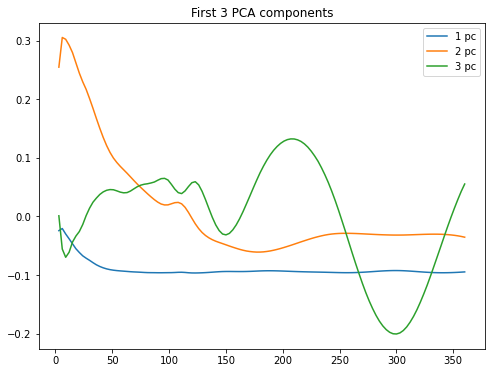

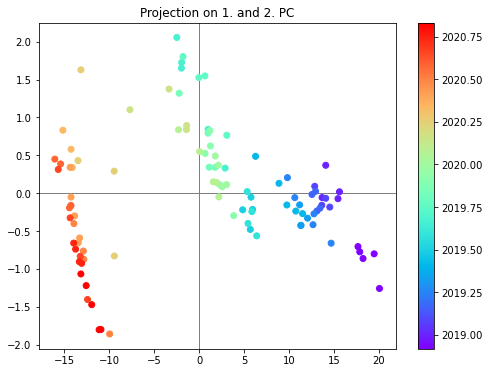

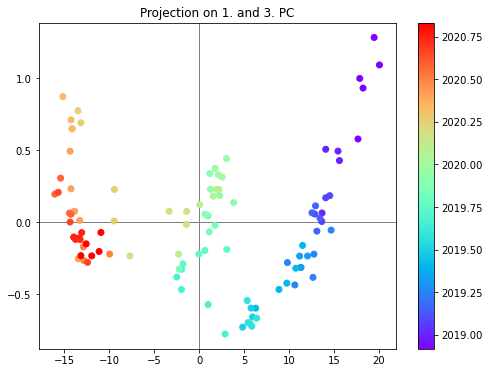

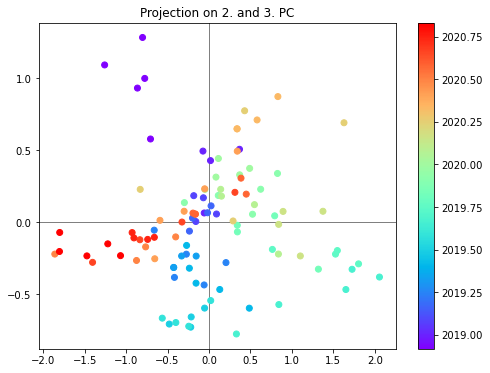

In [74]:
DmnsRdct1(BasisSpd_zero)

## DmnsRdct2: MDS

In [75]:
scaler = StandardScaler()
scaler.fit(Treasury_zero)
Treasury_zero_scaled = scaler.transform(Treasury_zero)

In [77]:
model2 = MDS(n_components=3, dissimilarity='euclidean')
Treasury_zero_low = pd.DataFrame(model2.fit_transform(Treasury_zero_scaled))
Treasury_zero_low.index = Treasury_zero.index

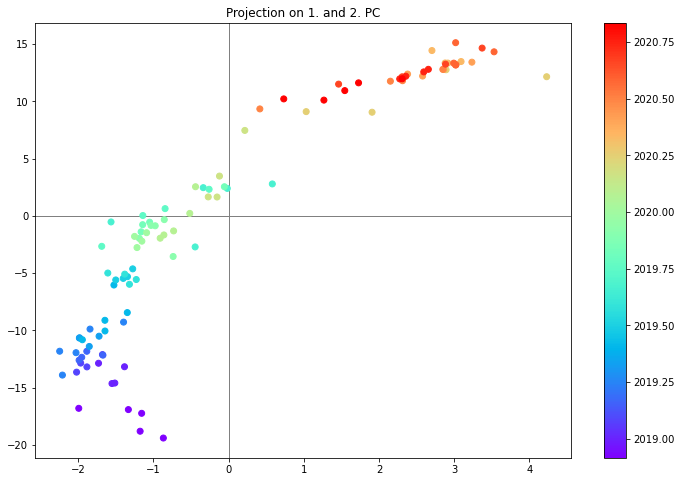

In [81]:
pc1 = 0
pc2 = 1
fig = plt.figure(figsize=(12,8))
plt.title('Projection on {0}. and {1}. PC'.format(pc1+1,pc2+1))
plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)

sc = plt.scatter(Treasury_zero_low.loc[:,pc1],Treasury_zero_low.loc[:,pc2], c=[d.year + d.month/12 for d in Treasury_zero_low.index], cmap='rainbow')
cb = plt.colorbar(sc)

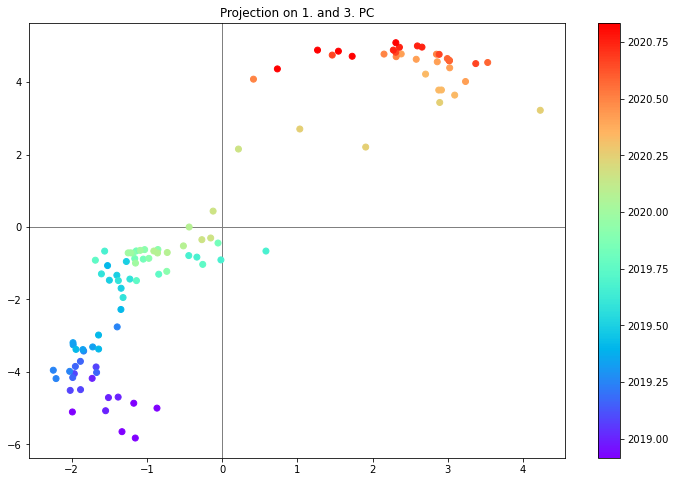

In [82]:
pc1 = 0
pc2 = 2
fig = plt.figure(figsize=(12,8))
plt.title('Projection on {0}. and {1}. PC'.format(pc1+1,pc2+1))
plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)

sc = plt.scatter(Treasury_zero_low.loc[:,pc1],Treasury_zero_low.loc[:,pc2], c=[d.year + d.month/12 for d in Treasury_zero_low.index], cmap='rainbow')
cb = plt.colorbar(sc)

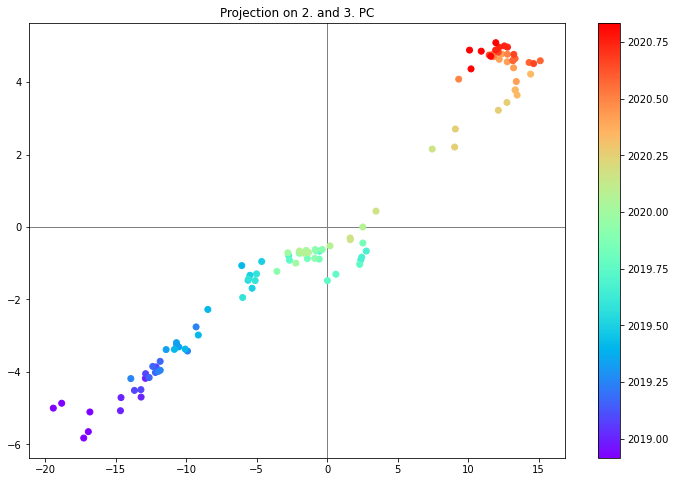

In [83]:
pc1 = 1
pc2 = 2
fig = plt.figure(figsize=(12,8))
plt.title('Projection on {0}. and {1}. PC'.format(pc1+1,pc2+1))
plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)

sc = plt.scatter(Treasury_zero_low.loc[:,pc1],Treasury_zero_low.loc[:,pc2], c=[d.year + d.month/12 for d in Treasury_zero_low.index], cmap='rainbow')
cb = plt.colorbar(sc)

## DmnsRdct3: LLE

In [95]:
model3 = LocallyLinearEmbedding(n_components=3, n_neighbors = 10)
Treasury_zero_low = pd.DataFrame(model3.fit_transform(Treasury_zero_scaled))
Treasury_zero_low.index = Treasury_zero.index

In [96]:
Treasury_zero_low

,0,1,2
2018-11-02,-0.104423,-0.232054,0.024762
2018-11-09,-0.102918,-0.222204,0.023628
2018-11-16,-0.099487,-0.199295,0.020161
2018-11-23,-0.098558,-0.193151,0.019340
2018-11-30,-0.097744,-0.187668,0.018422
...,...,...,...
2020-10-02,0.128130,-0.008466,0.150052
2020-10-09,0.107308,0.016492,0.223350
2020-10-16,0.118510,0.002919,0.172629
2020-10-23,0.093097,0.033610,0.279889


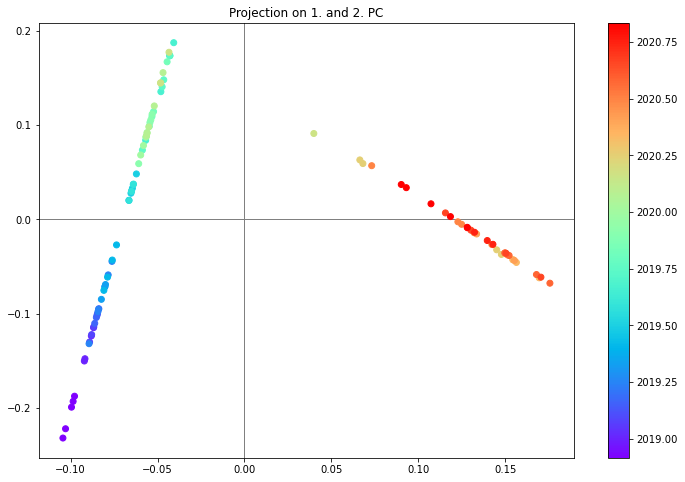

In [97]:
pc1 = 0
pc2 = 1
fig = plt.figure(figsize=(12,8))
plt.title('Projection on {0}. and {1}. PC'.format(pc1+1,pc2+1))
plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)

sc = plt.scatter(Treasury_zero_low.loc[:,pc1],Treasury_zero_low.loc[:,pc2], c=[d.year + d.month/12 for d in Treasury_zero_low.index], cmap='rainbow')
cb = plt.colorbar(sc)

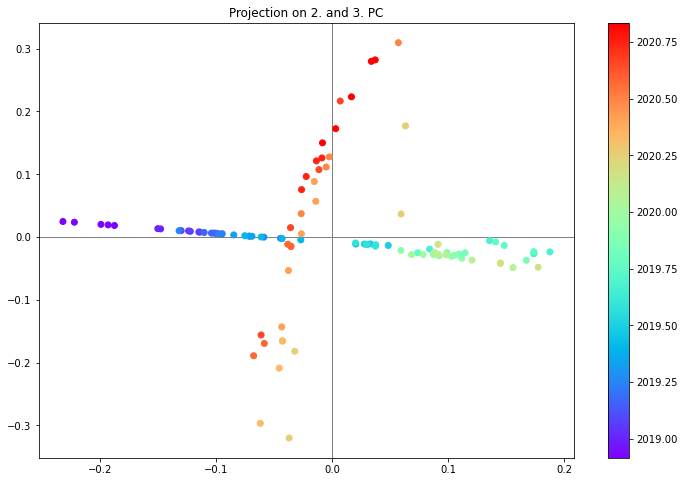

In [98]:
pc1 = 1
pc2 = 2
fig = plt.figure(figsize=(12,8))
plt.title('Projection on {0}. and {1}. PC'.format(pc1+1,pc2+1))
plt.axhline(y=0,c="grey",linewidth=1.0,zorder=0)
plt.axvline(x=0,c="grey",linewidth=1.0,zorder=0)

sc = plt.scatter(Treasury_zero_low.loc[:,pc1],Treasury_zero_low.loc[:,pc2], c=[d.year + d.month/12 for d in Treasury_zero_low.index], cmap='rainbow')
cb = plt.colorbar(sc)

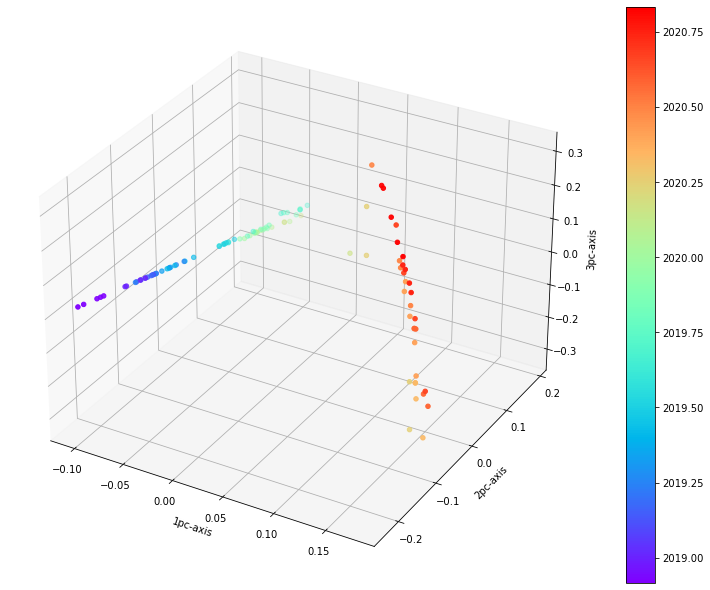

In [105]:
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)

sc = ax.scatter(Treasury_zero_low.loc[:,0],Treasury_zero_low.loc[:,1], Treasury_zero_low.loc[:,2], c=[d.year + d.month/12 for d in Treasury_zero_low.index], cmap='rainbow')
ax.set_xlabel('1pc-axis')
ax.set_ylabel('2pc-axis')
ax.set_zlabel('3pc-axis')
cb = plt.colorbar(sc)

## DmnsRdct4: t-SNE

### Time Series Forecasting in low-D with inverse transform back to high-D